# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve)

## Question 1
Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the
- Training Error (MSE, MAE)
- Testing Error (MSE, MAE)

In [176]:
college = pd.read_csv('../data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


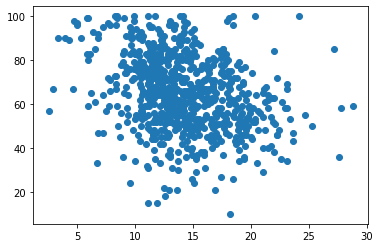

In [177]:
df = college[['S.F.Ratio','Grad.Rate']]
df = df[(df['Grad.Rate'] <= 100) & (df['S.F.Ratio'] < 35)]
x = np.array(df['S.F.Ratio']).reshape(-1, 1)
y = np.array(df['Grad.Rate'])
plt.scatter(x,y)

For my regression model, I chose the College dataset to regress the dependent variable of graduation rate against student-to-faculty ratio.

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [179]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
linear.coef_, linear.intercept_

(array([-1.25036188]), 83.13720320362248)

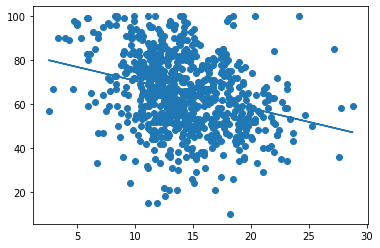

In [180]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, linear.coef_) + linear.intercept_)

In [181]:
mean_squared_error(y_test, np.dot(x_test, linear.coef_) + linear.intercept_)

299.5440736081614

In [182]:
mean_squared_error(y_train, np.dot(x_train, linear.coef_) + linear.intercept_)

252.3663149961931

In [183]:
mean_absolute_error(y_test, np.dot(x_test, linear.coef_) + linear.intercept_)

13.73567513862891

In [184]:
mean_absolute_error(y_train, np.dot(x_train, linear.coef_) + linear.intercept_)

12.67822124125226

## Question 2
Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate
- Accuracy
- Confusion Matrix
- Classifcation Report

In [185]:
headers = ['wife_age','wife_edu','husband_edu','num_children',
           'wife_religion','wife_work','husband_job','sol_index',
          'media_exposure','contra_method']
contra = pd.read_csv('../add_data/cmc.data',names = headers)
contra.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_work,husband_job,sol_index,media_exposure,contra_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


For my classification dataset, I chose UCI's Contraception Method Choice dataset, a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

In [186]:
x2_train, x2_test, y2_train, y2_test = train_test_split(contra.drop(['contra_method'], axis=1),contra.contra_method, test_size=.40)

In [187]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x2_train, y2_train)
list(zip(contra.drop(['contra_method'], axis=1).columns, clf.feature_importances_))

[('wife_age', 0.3310424070378592),
 ('wife_edu', 0.08542633973340909),
 ('husband_edu', 0.06921214948085026),
 ('num_children', 0.20241098682850717),
 ('wife_religion', 0.04604852009657069),
 ('wife_work', 0.04282123283753735),
 ('husband_job', 0.09893330963345284),
 ('sol_index', 0.10666790090860613),
 ('media_exposure', 0.01743715344320727)]

In [188]:
predictions = clf.predict(x2_test)
accuracy_score(y2_test, predictions)

0.5

In [189]:
confusion_matrix(y2_test, predictions)

array([[158,  35,  66],
       [ 44,  47,  49],
       [ 58,  43,  90]])

In [190]:
print(classification_report(y2_test, predictions))

              precision    recall  f1-score   support

           1       0.61      0.61      0.61       259
           2       0.38      0.34      0.35       140
           3       0.44      0.47      0.45       191

    accuracy                           0.50       590
   macro avg       0.47      0.47      0.47       590
weighted avg       0.50      0.50      0.50       590



## Bonus
See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features).

In [191]:
improve = contra.copy()
improve['contra_use'] = improve['contra_method']>1
improve['contra_use'] = improve['contra_use'].astype(int)
improve.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_work,husband_job,sol_index,media_exposure,contra_method,contra_use
0,24,2,3,3,1,1,2,3,0,1,0
1,45,1,3,10,1,1,3,4,0,1,0
2,43,2,3,7,1,1,3,4,0,1,0
3,42,3,2,9,1,1,3,3,0,1,0
4,36,3,3,8,1,1,3,2,0,1,0


In [192]:
x3_train, x3_test, y3_train, y3_test = train_test_split(improve.drop(['contra_method','contra_use'], axis=1),improve.contra_use, test_size=.40)

In [193]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(x3_train, y3_train)
list(zip(improve.drop(['contra_method','contra_use'], axis=1).columns, clf2.feature_importances_))

[('wife_age', 0.35571946122733356),
 ('wife_edu', 0.07510807952251299),
 ('husband_edu', 0.0524814812329207),
 ('num_children', 0.23347609013661205),
 ('wife_religion', 0.03406725618236256),
 ('wife_work', 0.04989072513071268),
 ('husband_job', 0.09386182854096084),
 ('sol_index', 0.08943011658197891),
 ('media_exposure', 0.015964961444605595)]

In [194]:
predictions2 = clf2.predict(x3_test)
accuracy_score(y3_test, predictions2)

0.6440677966101694

In [195]:
confusion_matrix(y3_test, predictions2)

array([[151, 107],
       [103, 229]])

In [196]:
print(classification_report(y3_test, predictions2))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       258
           1       0.68      0.69      0.69       332

    accuracy                           0.64       590
   macro avg       0.64      0.64      0.64       590
weighted avg       0.64      0.64      0.64       590



After failing to improve accuracy or the classification report after numerous iterations of removing features from my Question 2 model, I chose to re-classify the contraception method column as a dummy variable based on contraception use (short-term and long-term use both classified as 1). With this modification to the dependent variable, I was able to see a marked improvement in the model's accuracy and classification statistics, though precision of no contraception usage (0 in the second model, 1 in the first) dropped slightly.